In [9]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [21]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
perfomances_dt5
# baselevel_p = perfomances_dt5[(perfomances_dt5['NMS'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['P'].to_numpy()[0]
# perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
# # CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
# baselevel_y = perfomances_dt5[(perfomances_dt5['NMS'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['Y_corn'].to_numpy()[0]
# perfomances_dt5['Y_corn_pct'] = perfomances_dt5['Y_corn']/baselevel_y

# # #Keep change in Y >= 95%
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] >= 0.95]
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] <= 1.05]

# # #Calculate ag-sector cost
# perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt5['L_change'] = -perfomances_dt5['L_change']
# perfomances_dt5[perfomances_dt5['policy_name'] == 'ratio']
perfomances_dt5

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
0,ratio_5,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.000000,8.9,1659.504098,1.100434,5.0,ratio
1,ratio_6,dynamic,12669.298020,38.258298,166.480672,1633.857958,23.307294,12.4,1657.165252,3.439280,6.0,ratio
2,ratio_7,dynamic,12614.408659,36.911936,160.901631,1608.333614,45.052457,15.5,1653.386070,7.218462,7.0,ratio
3,ratio_8,dynamic,12561.314479,35.871759,156.325988,1583.498920,65.656915,17.9,1649.155835,11.448697,8.0,ratio
4,ratio_9,dynamic,12499.298894,34.846755,151.565652,1558.929124,84.876765,20.3,1643.805889,16.798643,9.0,ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
113,red_23,static,12351.067200,34.022292,147.434492,1625.945263,0.000000,22.1,1625.945263,34.659269,23.0,red
114,red_24,static,12203.190573,33.160402,141.153422,1609.639285,0.000000,24.1,1609.639285,50.965247,24.0,red
115,red_25,static,12203.190573,33.160402,141.153422,1609.639285,0.000000,24.1,1609.639285,50.965247,25.0,red
116,red_26,static,12175.077916,32.558052,138.587914,1607.499369,0.000000,25.5,1607.499369,53.105164,26.0,red


In [22]:
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_change'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == 'static')]
leach_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NMS'] == 'static')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NMS'] == 'static')]
bal_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NMS'] == 'static')]

ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == 'dynamic')]
leach_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NMS'] == 'dynamic')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NMS'] == 'dynamic')]
bal_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NMS'] == 'dynamic')]

nred_2_dt

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
30,red_0,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.0,8.9,1659.504098,1.100434,0.0,red
31,red_1,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.0,8.9,1659.504098,1.100434,1.0,red
32,red_2,dynamic,12716.475601,39.817473,172.574416,1659.504493,0.0,8.9,1659.504493,1.100039,2.0,red
33,red_3,dynamic,12661.938500,38.053237,165.838083,1656.584732,0.0,12.9,1656.584732,4.019800,3.0,red
34,red_4,dynamic,12631.879640,37.469927,163.141131,1654.264358,0.0,14.3,1654.264358,6.340174,4.0,red
35,red_5,dynamic,12626.527256,37.386747,162.685581,1653.833909,0.0,14.4,1653.833909,6.770623,5.0,red
36,red_6,dynamic,12624.634123,37.375419,162.585102,1653.639206,0.0,14.5,1653.639206,6.965326,6.0,red
37,red_7,dynamic,12623.982693,37.325334,162.434498,1653.653429,0.0,14.6,1653.653429,6.951104,7.0,red
38,red_8,dynamic,12588.190358,36.442972,159.019289,1651.033148,0.0,16.6,1651.033148,9.571384,8.0,red
39,red_9,dynamic,12543.893424,35.794302,155.838083,1647.058421,0.0,18.1,1647.058421,13.546111,9.0,red


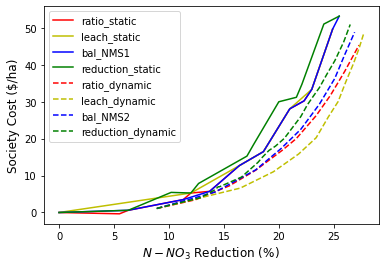

In [24]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['policy_cost'], color = 'r', label = 'ratio_static')
ax.plot(leach_1_dt['L_change'], leach_1_dt['policy_cost'], color = 'y', label = 'leach_static')
ax.plot(bal_1_dt['L_change'], bal_1_dt['policy_cost'], color = 'b', label = 'bal_NMS1')
ax.plot(nred_1_dt['L_change'], nred_1_dt['policy_cost'], color = 'g', label = 'reduction_static')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['policy_cost'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(leach_2_dt['L_change'], leach_2_dt['policy_cost'], linestyle='dashed', color = 'y', label = 'leach_dynamic')
ax.plot(bal_2_dt['L_change'], bal_2_dt['policy_cost'], linestyle='dashed', color = 'b', label = 'bal_NMS2')
ax.plot(nred_2_dt['L_change'], nred_2_dt['policy_cost'], linestyle='dashed', color = 'g', label = 'reduction_dynamic')


plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Society Cost ($/ha)", size = 12)
#ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.pdf"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.png"
plt.savefig(plot_file_name, dpi=300)